# WeatherPy
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

636


## Perform API calls

In [3]:
# Dataframe declaration for the storage of data
columns_cityinfo = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
weather_pd = pd.DataFrame(columns = columns_cityinfo)

# Config information
base_url = "http://api.openweathermap.org/data/2.5/weather?q=" 
api_key = "&appid=" + weather_api_key

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    
    # Concatinate URL for API request
    url = base_url + city + api_key
    
    print("Processing Record " + str((cities.index(city))+1) + " of " + str(len(cities)) + " | " + city)
    
    # Get weather data
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    
    # If a city is found add it to the data frame
    if(weather_json["cod"] != "404"):
        weather_pd.loc[cities.index(city)] = [weather_json["name"], weather_json["coord"]["lat"], weather_json["coord"]["lon"], weather_json["main"]["temp_max"], weather_json["main"]["humidity"], weather_json["clouds"]["all"], weather_json["wind"]["speed"], weather_json["sys"]["country"], weather_json["dt"]]
        
    else:    
        print("City not found. Skipping...")   
        

Beginning Data Retrieval
------------------------
Processing Record 1 of 636 | chifeng
Processing Record 2 of 636 | cabo san lucas
Processing Record 3 of 636 | usolye-sibirskoye
Processing Record 4 of 636 | salinas
Processing Record 5 of 636 | tiznit
Processing Record 6 of 636 | tutoia
Processing Record 7 of 636 | punta arenas
Processing Record 8 of 636 | bolshiye uki
City not found. Skipping...
Processing Record 9 of 636 | katherine
Processing Record 10 of 636 | new norfolk
Processing Record 11 of 636 | hobart
Processing Record 12 of 636 | cidreira
Processing Record 13 of 636 | kaitangata
Processing Record 14 of 636 | chilca
Processing Record 15 of 636 | tuktoyaktuk
Processing Record 16 of 636 | srednekolymsk
Processing Record 17 of 636 | qaanaaq
Processing Record 18 of 636 | hermanus
Processing Record 19 of 636 | bilibino
Processing Record 20 of 636 | khatanga
Processing Record 21 of 636 | tsihombe
City not found. Skipping...
Processing Record 22 of 636 | kapaa
Processing Record 23 o

Processing Record 194 of 636 | porto torres
Processing Record 195 of 636 | sitka
Processing Record 196 of 636 | etah
Processing Record 197 of 636 | kalabugao
City not found. Skipping...
Processing Record 198 of 636 | beira
Processing Record 199 of 636 | vardo
Processing Record 200 of 636 | rawannawi
City not found. Skipping...
Processing Record 201 of 636 | alofi
Processing Record 202 of 636 | mincivan
Processing Record 203 of 636 | kaeo
Processing Record 204 of 636 | east london
Processing Record 205 of 636 | bondo
Processing Record 206 of 636 | fortuna
Processing Record 207 of 636 | nanortalik
Processing Record 208 of 636 | barranca
Processing Record 209 of 636 | umm lajj
Processing Record 210 of 636 | tiksi
Processing Record 211 of 636 | tuatapere
Processing Record 212 of 636 | tukrah
Processing Record 213 of 636 | fort saint john
City not found. Skipping...
Processing Record 214 of 636 | amderma
City not found. Skipping...
Processing Record 215 of 636 | banjar
Processing Record 216

Processing Record 386 of 636 | cayenne
Processing Record 387 of 636 | noumea
Processing Record 388 of 636 | gimli
Processing Record 389 of 636 | alihe
Processing Record 390 of 636 | saryshagan
City not found. Skipping...
Processing Record 391 of 636 | paslek
Processing Record 392 of 636 | loikaw
Processing Record 393 of 636 | gurgan
City not found. Skipping...
Processing Record 394 of 636 | lhokseumawe
Processing Record 395 of 636 | lyngdal
Processing Record 396 of 636 | touros
Processing Record 397 of 636 | grand river south east
City not found. Skipping...
Processing Record 398 of 636 | salamanca
Processing Record 399 of 636 | bandarbeyla
Processing Record 400 of 636 | gorlice
Processing Record 401 of 636 | burnie
Processing Record 402 of 636 | farso
Processing Record 403 of 636 | olkhovka
Processing Record 404 of 636 | port lincoln
Processing Record 405 of 636 | niquero
Processing Record 406 of 636 | bosaso
Processing Record 407 of 636 | takob
City not found. Skipping...
Processing 

Processing Record 580 of 636 | olafsvik
Processing Record 581 of 636 | epernay
Processing Record 582 of 636 | ulladulla
Processing Record 583 of 636 | ransang
Processing Record 584 of 636 | parrita
Processing Record 585 of 636 | elko
Processing Record 586 of 636 | pitimbu
Processing Record 587 of 636 | acheng
Processing Record 588 of 636 | halalo
City not found. Skipping...
Processing Record 589 of 636 | fort-shevchenko
Processing Record 590 of 636 | bolungarvik
City not found. Skipping...
Processing Record 591 of 636 | leningradskiy
Processing Record 592 of 636 | abu zabad
Processing Record 593 of 636 | baghdad
Processing Record 594 of 636 | dwarka
Processing Record 595 of 636 | suez
Processing Record 596 of 636 | igrim
Processing Record 597 of 636 | sola
Processing Record 598 of 636 | stonewall
Processing Record 599 of 636 | yanji
Processing Record 600 of 636 | san jose de rio tinto
Processing Record 601 of 636 | apatity
Processing Record 602 of 636 | matagami
Processing Record 603 o

## From raw data to data frame

In [4]:
# Convert humidity, cloudiness, and date columns to floats in order to get stats. Quartiles are done with float type variables
weather_pd = weather_pd.astype({'Humidity': 'float','Cloudiness': 'float','Date': 'float'})
weather_pd = weather_pd.drop_duplicates()
weather_pd.to_csv(output_data_file)

weather_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chifeng,42.2683,118.9636,268.87,92.0,99.0,0.50,CN,1.612071e+09
1,Cabo San Lucas,22.8909,-109.9124,290.93,82.0,53.0,0.45,MX,1.612071e+09
2,Usol'ye-Sibirskoye,52.7519,103.6453,243.74,82.0,100.0,5.31,RU,1.612071e+09
3,Salinas,36.6777,-121.6555,284.15,81.0,40.0,1.62,US,1.612071e+09
4,Tiznit Province,29.5833,-9.5000,285.85,79.0,22.0,0.68,MA,1.612071e+09
...,...,...,...,...,...,...,...,...,...
630,Methóni,36.8197,21.7049,283.71,100.0,20.0,2.74,GR,1.612071e+09
631,Mâncio Lima,-7.6142,-72.8958,295.20,95.0,82.0,0.44,BR,1.612071e+09
632,Huilong,31.8111,121.6550,287.59,62.0,93.0,0.89,CN,1.612071e+09
633,Bakchar,57.0186,82.0711,246.11,86.0,100.0,2.82,RU,1.612071e+09


In [5]:
# Calculate Stats - All could be done with describe() - Left for reference
count = weather_pd.count().to_frame().T.rename(index={0: 'count'})
mean = weather_pd.mean().to_frame().T.rename(index={0: 'mean'})
std = weather_pd.std().to_frame().T.rename(index={0: 'std'})
min_data = weather_pd.min().to_frame().T.rename(index={0: 'min'})
quartile25 = weather_pd.quantile(0.25).to_frame().T.rename(index={0.25: '25%'})
median = weather_pd.median().to_frame().T.rename(index={0: '50%'})
quartile75 = weather_pd.quantile(0.75).to_frame().T.rename(index={0.75: '75%'})
max_data = weather_pd.max().to_frame().T.rename(index={0: 'max'})

stats = pd.concat([count,mean,std,min_data,quartile25,median,quartile75,max_data],axis=0)
stats = stats.drop(['City', 'Country'], axis=1)
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584,584,584,584,584,584,584
mean,20.667,21.8988,282.374,73.5634,55.2568,3.43918,1.61207e+09
std,32.8939,88.4369,18.4772,20.7286,38.9475,2.51109,66.1022
min,-54.8,-175.2,228.9,14,0,0.14,1.61207e+09
25%,-6.2347,-54.3458,270.15,62.75,18.75,1.54,1.61207e+09
50%,24.744,23.56,288.665,79,68,2.73,1.61207e+09
75%,49.0583,100.707,296.15,90,94.25,4.69,1.61207e+09
max,78.2186,179.317,313.15,100,100,16.76,1.61207e+09


In [6]:
# Display stats
weather_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,20.666963,21.898780,282.373562,73.563356,55.256849,3.439178,1.612071e+09
std,32.893859,88.436851,18.477171,20.728567,38.947506,2.511092,6.610216e+01
min,-54.800000,-175.200000,228.900000,14.000000,0.000000,0.140000,1.612071e+09
25%,-6.234700,-54.345800,270.150000,62.750000,18.750000,1.540000,1.612071e+09
50%,24.744000,23.559950,288.665000,79.000000,68.000000,2.730000,1.612071e+09
75%,49.058325,100.707400,296.150000,90.000000,94.250000,4.690000,1.612071e+09
max,78.218600,179.316700,313.150000,100.000000,100.000000,16.760000,1.612071e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [7]:
# If humidity is greater than 100 then add to new data frame
humidity_weather_pd = weather_pd.loc[(weather_pd["Humidity"] > 100)]
if(humidity_weather_pd.empty == True):
    print("No cities where humidity is greater than 100%")

No cities where humidity is greater than 100%


In [8]:
# Get the indices of cities that have humidity over 100%
index_list = humidity_weather_pd.index.values.tolist()
index_list

[]

In [9]:
# Eliminate rows with humidity > 100
clean_city_data = weather_pd.drop(index_list,axis=0)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chifeng,42.2683,118.9636,268.87,92.0,99.0,0.50,CN,1.612071e+09
1,Cabo San Lucas,22.8909,-109.9124,290.93,82.0,53.0,0.45,MX,1.612071e+09
2,Usol'ye-Sibirskoye,52.7519,103.6453,243.74,82.0,100.0,5.31,RU,1.612071e+09
3,Salinas,36.6777,-121.6555,284.15,81.0,40.0,1.62,US,1.612071e+09
4,Tiznit Province,29.5833,-9.5000,285.85,79.0,22.0,0.68,MA,1.612071e+09
...,...,...,...,...,...,...,...,...,...
630,Methóni,36.8197,21.7049,283.71,100.0,20.0,2.74,GR,1.612071e+09
631,Mâncio Lima,-7.6142,-72.8958,295.20,95.0,82.0,0.44,BR,1.612071e+09
632,Huilong,31.8111,121.6550,287.59,62.0,93.0,0.89,CN,1.612071e+09
633,Bakchar,57.0186,82.0711,246.11,86.0,100.0,2.82,RU,1.612071e+09


## Plotting the data
-------

### Latitude vs Temperature Plot

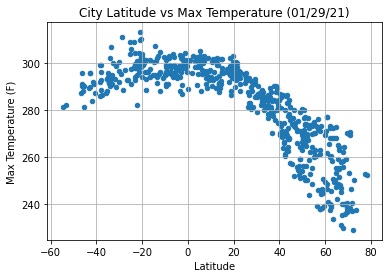

In [10]:
clean_city_data.plot.scatter(x="Lat",y="Max Temp")
plt.title("City Latitude vs Max Temperature (01/29/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/city_latitude_vs_temp")
plt.show()

The data analyzed shows that the closer cities are to the poles, the lower the maximum temperature gets. Maximum temperatures of cities near the poles tend to vary more compared to the cities near the equator.

### Latitude vs Humidity Plot

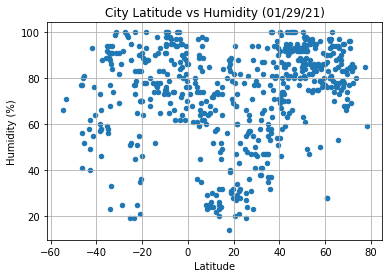

In [11]:
clean_city_data.plot.scatter(x="Lat",y="Humidity")
plt.title("City Latitude vs Humidity (01/29/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/city_latitude_vs_humidity")
plt.show()

Cities analyzed tend to have a high humidity percentage, cities near the equator have an averagely lower humidity percentage.

### Latitude vs Cloudiness Plot

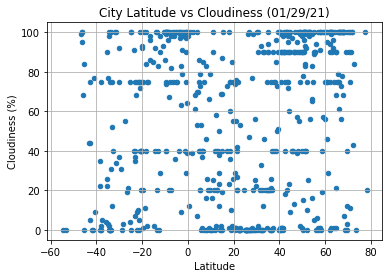

In [12]:
clean_city_data.plot.scatter(x="Lat",y="Cloudiness")
plt.title("City Latitude vs Cloudiness (01/29/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/city_latitude_vs_cloudiness")
plt.show()

Most of the data comes in intervals of 20. Most cities are eithe in the 0% or the 100% cloudiness, and most of them are in the northern hemisphere. Most of the cities in the 40% cloudiness are in the southern hemisphere. The rest of cities are evenly distributed between cloudiness percentage and latitude.

### Latitude vs Wind Speed Plot

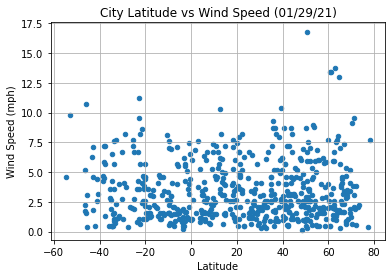

In [13]:
clean_city_data.plot.scatter(x="Lat",y="Wind Speed")
plt.title("City Latitude vs Wind Speed (01/29/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/city_latitude_vs_wind_speed")
plt.show()

Most of the cities range between 0 and 7.5 mph wind speeds.

## Linear Regression
---

Set of plots of data divided between northern and southern hemisphere.

### Northern Hemisphere - Max Temp vs Latitude Linear Regression

The correlation between latitude and temperature is: -0.88


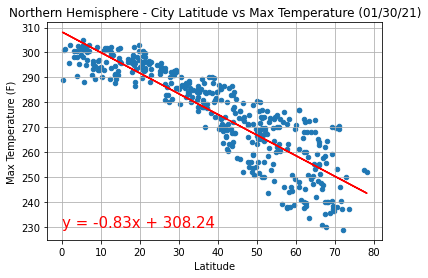

In [14]:
north_hemisphere_cdata = clean_city_data.loc[(clean_city_data["Lat"] >= 0)] 
north_hemisphere_cdata.plot.scatter(x="Lat",y="Max Temp")
plt.title("Northern Hemisphere - City Latitude vs Max Temperature (01/30/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(north_hemisphere_cdata['Lat'],north_hemisphere_cdata['Max Temp'])[0],2)
regression = st.linregress(north_hemisphere_cdata['Lat'], north_hemisphere_cdata['Max Temp'])
y_eq = regression[0]*north_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(north_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(0,230),fontsize=15,color="red")
print('The correlation between latitude and temperature is: ' + str(correlation))
plt.savefig("output_data/north-city_latitude_vs_temp")

plt.show()

###  Southern Hemisphere - Max Temp vs Latitude Linear Regression

The correlation between latitude and temperature is: 0.41


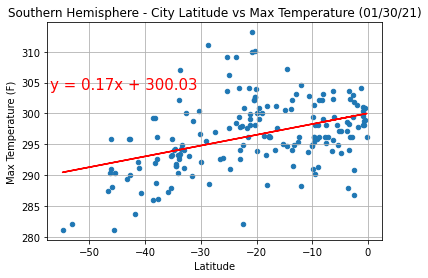

In [15]:
south_hemisphere_cdata = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
south_hemisphere_cdata.plot.scatter(x="Lat",y="Max Temp")
plt.title("Southern Hemisphere - City Latitude vs Max Temperature (01/30/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(south_hemisphere_cdata['Lat'],south_hemisphere_cdata['Max Temp'])[0],2)
regression = st.linregress(south_hemisphere_cdata['Lat'], south_hemisphere_cdata['Max Temp'])
y_eq = regression[0]*south_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(south_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(-57,304),fontsize=15,color="red")
print('The correlation between latitude and temperature is: ' + str(correlation))
plt.savefig("output_data/south-city_latitude_vs_temp")

plt.show()

The correlation between latitude and temperatureis high, the data shows what's expected. Maximum temperature gets lower as we approach the poles.

###  Northern Hemisphere - Humidity (%) vs Latitude Linear Regression

The correlation between latitude and humidity is: 0.47


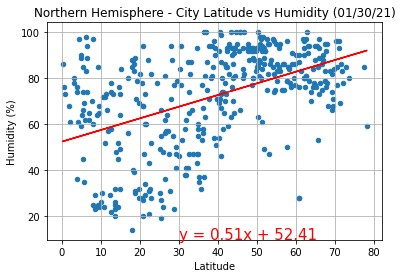

In [16]:
north_hemisphere_cdata.plot.scatter(x="Lat",y="Humidity")
plt.title("Northern Hemisphere - City Latitude vs Humidity (01/30/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(north_hemisphere_cdata['Lat'],north_hemisphere_cdata['Humidity'])[0],2)
regression = st.linregress(north_hemisphere_cdata['Lat'], north_hemisphere_cdata['Humidity'].astype(float))
y_eq = regression[0]*north_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(north_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(30,10),fontsize=15,color="red")
print('The correlation between latitude and humidity is: ' + str(correlation))
plt.savefig("output_data/north-city_latitude_vs_humidity")

plt.show()

###  Southern Hemisphere - Himidity (%) vs Latitude Linear Regression

The correlation between latitude and humidity is: 0.3


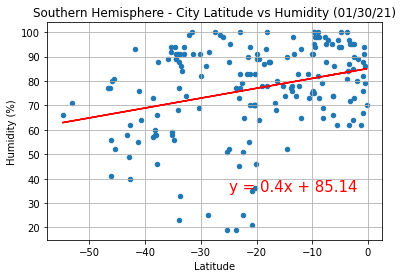

In [17]:
south_hemisphere_cdata.plot.scatter(x="Lat",y="Humidity")
plt.title("Southern Hemisphere - City Latitude vs Humidity (01/30/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(south_hemisphere_cdata['Lat'],south_hemisphere_cdata['Humidity'])[0],2)
regression = st.linregress(south_hemisphere_cdata['Lat'], south_hemisphere_cdata['Humidity'].astype(float))
y_eq = regression[0]*south_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(south_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(-25,35),fontsize=15,color="red")
print('The correlation between latitude and humidity is: ' + str(correlation))
plt.savefig("output_data/south-city_latitude_vs_humidity")

plt.show()

The data shows that humidity tends to increase the closer the cities are to the poles. There's a wide range of humidity for cities closer to the equator.

###  Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

The correlation between latitude and cloudiness is: 0.35


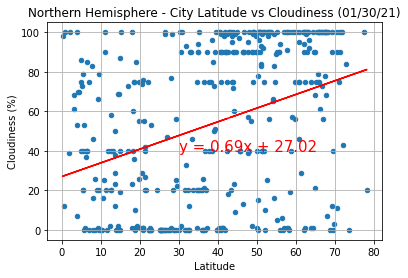

In [18]:
north_hemisphere_cdata.plot.scatter(x="Lat",y="Cloudiness")
plt.title("Northern Hemisphere - City Latitude vs Cloudiness (01/30/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(north_hemisphere_cdata['Lat'],north_hemisphere_cdata['Cloudiness'])[0],2)
regression = st.linregress(north_hemisphere_cdata['Lat'], north_hemisphere_cdata['Cloudiness'].astype(float))
y_eq = regression[0]*north_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(north_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(30,40),fontsize=15,color="red")
print('The correlation between latitude and cloudiness is: ' + str(correlation))
plt.savefig("output_data/north-city_latitude_vs_coudiness")

plt.show()

###  Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

The correlation between latitude and cloudiness is: 0.42


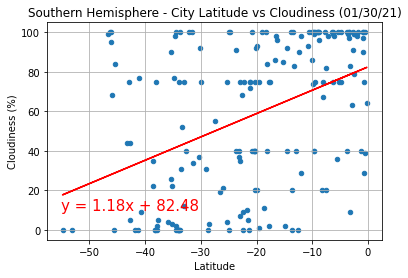

In [19]:
south_hemisphere_cdata.plot.scatter(x="Lat",y="Cloudiness")
plt.title("Southern Hemisphere - City Latitude vs Cloudiness (01/30/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(south_hemisphere_cdata['Lat'],south_hemisphere_cdata['Cloudiness'])[0],2)
regression = st.linregress(south_hemisphere_cdata['Lat'], south_hemisphere_cdata['Cloudiness'].astype(float))
y_eq = regression[0]*south_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(south_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(-55,10),fontsize=15,color="red")
print('The correlation between latitude and cloudiness is: ' + str(correlation))
plt.savefig("output_data/south-city_latitude_vs_cloudiness")

plt.show()

The data shows some correlation between latitude and cloudiness. In the shouthern hemisphere, the closer cities are to the pole, the less cloudy they are.

###  Northern Hemisphere - Wind Speeds (mph) vs Latitude Linear Regression

The correlation between latitude and wind speed is: 0.02


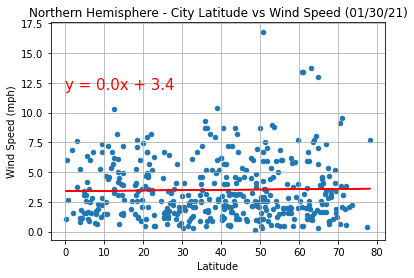

In [20]:
north_hemisphere_cdata.plot.scatter(x="Lat",y="Wind Speed")
plt.title("Northern Hemisphere - City Latitude vs Wind Speed (01/30/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(north_hemisphere_cdata['Lat'],north_hemisphere_cdata['Wind Speed'])[0],2)
regression = st.linregress(north_hemisphere_cdata['Lat'], north_hemisphere_cdata['Wind Speed'])
y_eq = regression[0]*north_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(north_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(0,12),fontsize=15,color="red")
print('The correlation between latitude and wind speed is: ' + str(correlation))
plt.savefig("output_data/north-city_latitude_vs_windspeed")

plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression

The correlation between latitude and wind speed is: -0.18


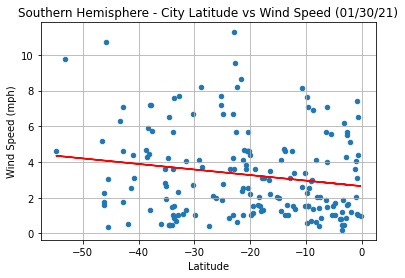

In [21]:
south_hemisphere_cdata.plot.scatter(x="Lat",y="Wind Speed")
plt.title("Southern Hemisphere - City Latitude vs Wind Speed (01/30/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(south_hemisphere_cdata['Lat'],south_hemisphere_cdata['Wind Speed'])[0],2)
regression = st.linregress(south_hemisphere_cdata['Lat'], south_hemisphere_cdata['Wind Speed'])
y_eq = regression[0]*south_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(south_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(-50,12),fontsize=15,color="red")
print('The correlation between latitude and wind speed is: ' + str(correlation))
plt.savefig("output_data/south-city_latitude_vs_windspeed")

plt.show()

Northern hemisphere data shows no correlation between latitude and wind speed, whereas, southern hemisphere data shows some correlation between the decrease of wind speed and cities closer to the south pole.